# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# your code here
exchange_rates = pd.read_csv("exch_rates.csv")
exchange_rates['Frequency'] = pd.to_datetime(exchange_rates['Frequency'])
exchange_rates.set_index('Frequency', inplace=True)

Plot the three exchange rates in one plot

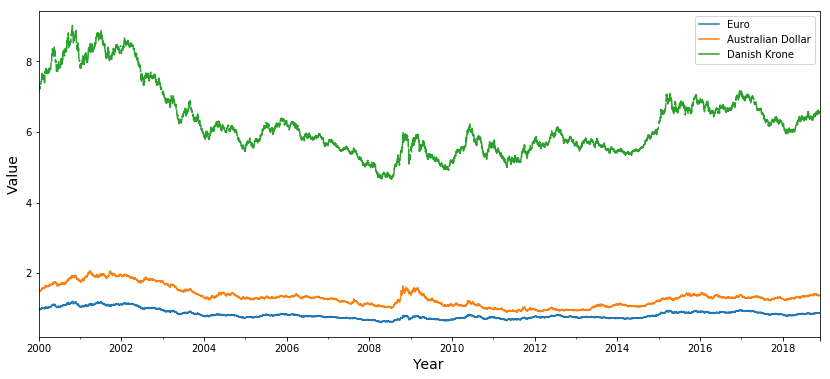

In [4]:
# your code here
exchange_rates.plot(figsize=(14, 6))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14);

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [5]:
# your code here
exchange_rates.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates for the Euro and the Danish Krone is nearly perfectly correlated (0.999952). 
The exchange rates for the Euro and the Australian dollar is highly correlated (0.883181). 
Given the relationship between the Euro and the Danish Krone as well as their locations of use, it seems likely that the Danish Krone is pegged to the Euro.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [7]:
# your code here
exchange_rates_diff = exchange_rates.diff(periods=1)

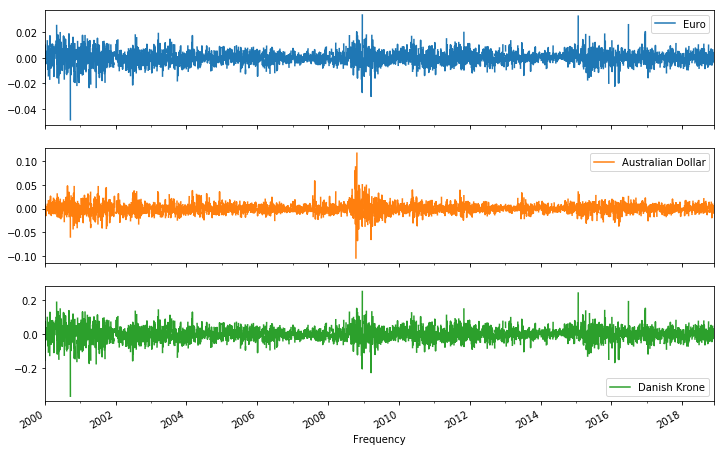

In [8]:
# your code here
exchange_rates_diff.plot(figsize=(12, 8), subplots=True, legend=True);

In [9]:
# your code here
exchange_rates_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on
Differencing the series decreases the correlation between the Euro and Australian Dollar exchange rates (0.545369). 
Differencing does not have a major impact on the Euro and Danish Krone correlation (0.999667).
Differencing is useful in reducing the trend and revealing the seasonality between variables.
In this case, there is low seasonality between the Australian Dollar and the Euro.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [10]:
# your code here
euro = exchange_rates[['Euro']]
euro_shift1 = euro.shift(periods=1)
euro_shift1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


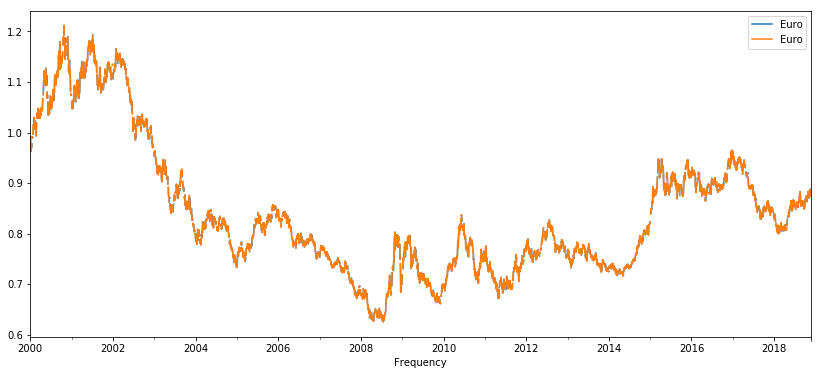

In [12]:
# your code here
euro_lag1 = pd.concat([euro_shift1, euro], axis=1)
euro_lag1.plot(figsize=(14, 6));

In [13]:
# your code here
euro_lag1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 50 autocorrelation"

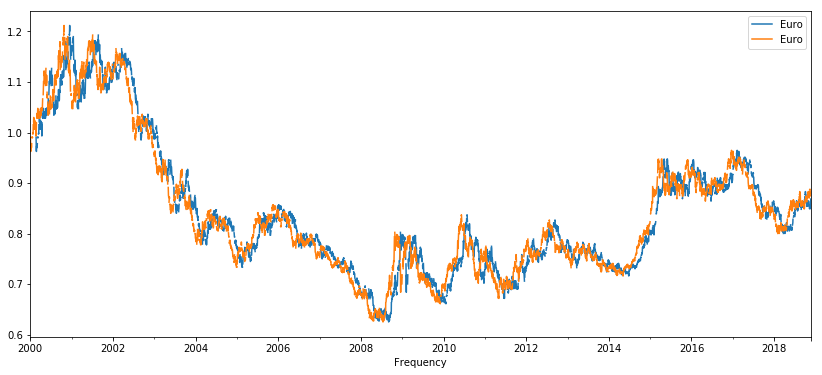

In [14]:
# your code here
euro_shift50 = euro.shift(periods=50)
euro_shift50.head()

euro_lag50 = pd.concat([euro_shift50, euro], axis=1)
euro_lag50.plot(figsize=(14, 6));

In [15]:
# your code here
euro_lag50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?
Autocorrelation is very high for a lag of 1 (0.999146) and remains high for a lag of 50 (0.968321). 
It makes sense that exchange rates for a given day would be reasonably dependent on the prior days values.

Knowing this, let's plot the ACF now.

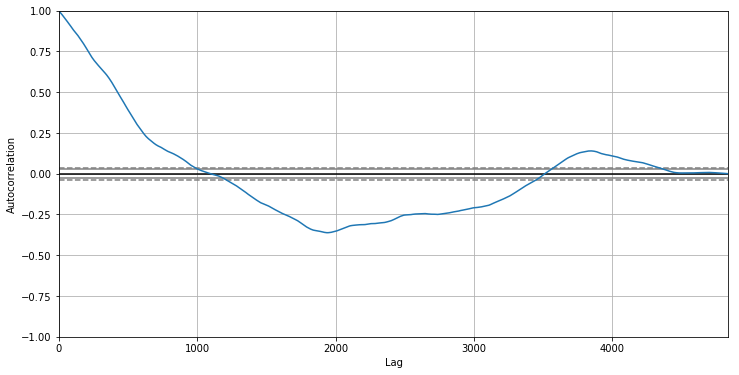

In [16]:
# your code here
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

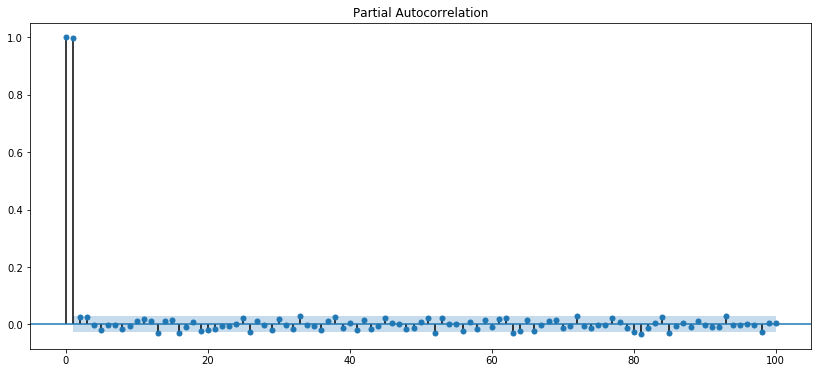

In [17]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 6
plot_pacf(euro.dropna(), lags=100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [18]:
# your code here
passengers = pd.read_csv('passengers.csv')
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month', inplace=True)

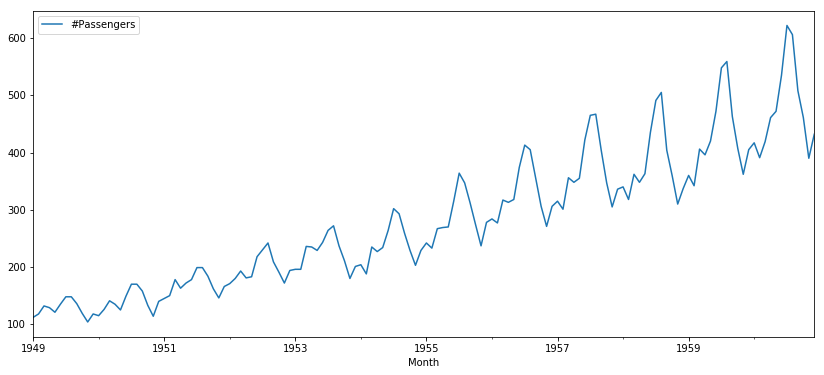

In [19]:
# your code here
passengers.plot()

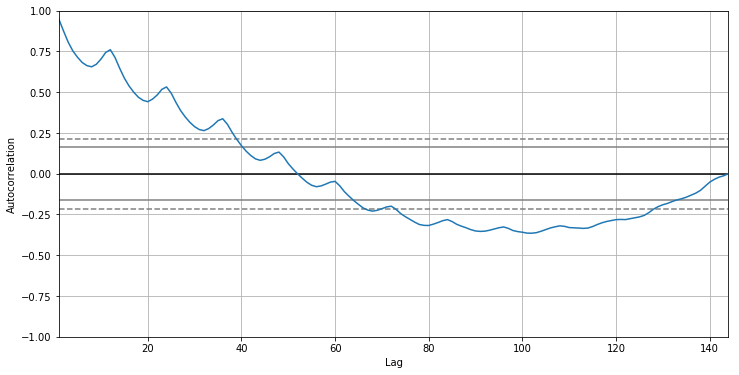

In [20]:
# your code here
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(passengers);

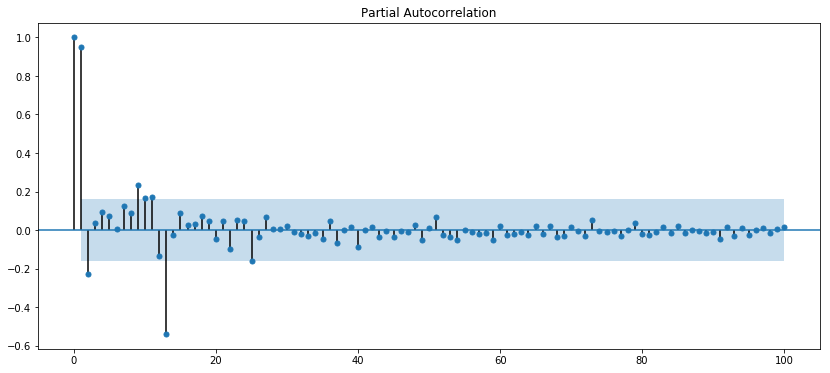

In [21]:
# your code here
rcParams['figure.figsize'] = 14, 6
plot_pacf(passengers.dropna(), lags=100, method='ywm');

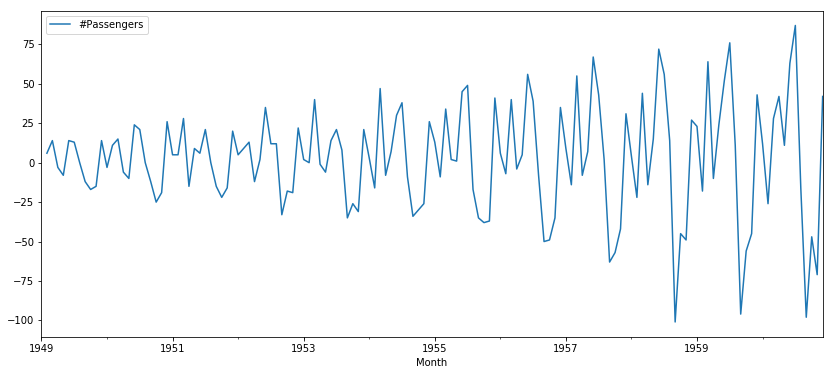

In [22]:
# your code here
passengers_diff = passengers.diff(periods=1)
passengers_diff.plot()

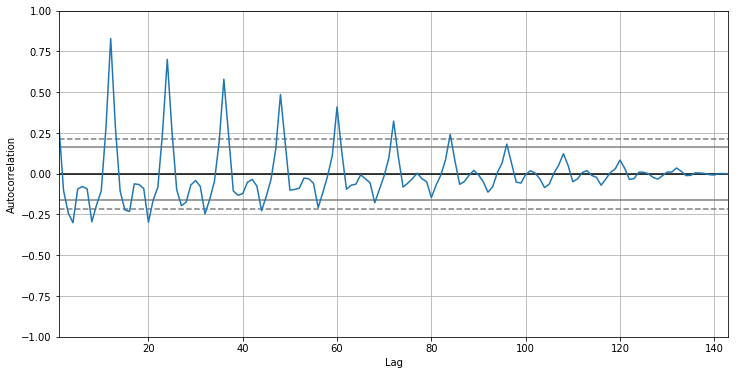

In [23]:
# your code here
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(passengers_diff.dropna());

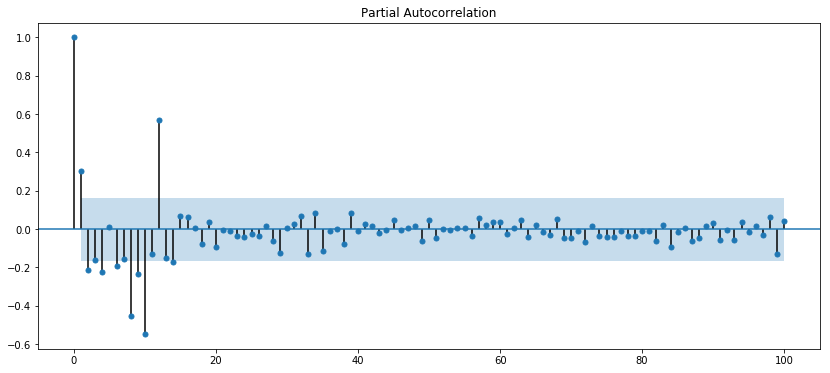

In [24]:
# your code here
rcParams['figure.figsize'] = 14, 6
plot_pacf(passengers_diff.dropna(), lags=100, method='ywm');

### Your conclusion here
The seasonality is much more clear in the differenced time series. 
The PACF for the differenced series has a moderate correlation at 1 month and a strong correlation at 12 months.
The PACF for the regular series exhibits a high correlation at 1 month.
The ACF of the differenced series shows great seasonality.
The ACF of the regular series decreases quickly with few additional features.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [25]:
# your code here
nyse = pd.read_csv("NYSE_monthly.csv")
col_name = 'Month'
nyse[col_name] = pd.to_datetime(nyse[col_name])
nyse.set_index(col_name, inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


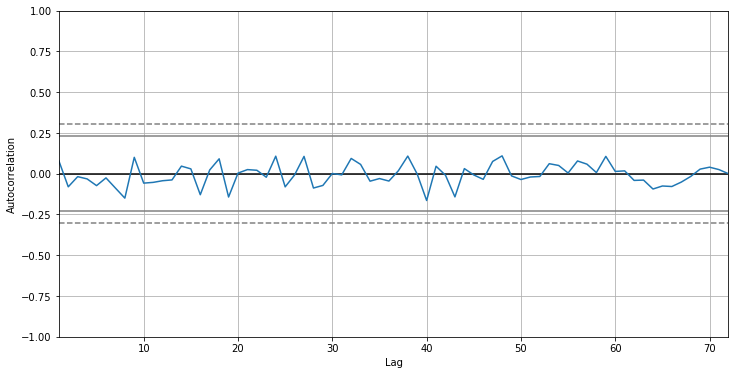

In [26]:
# your code here
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(nyse.dropna());

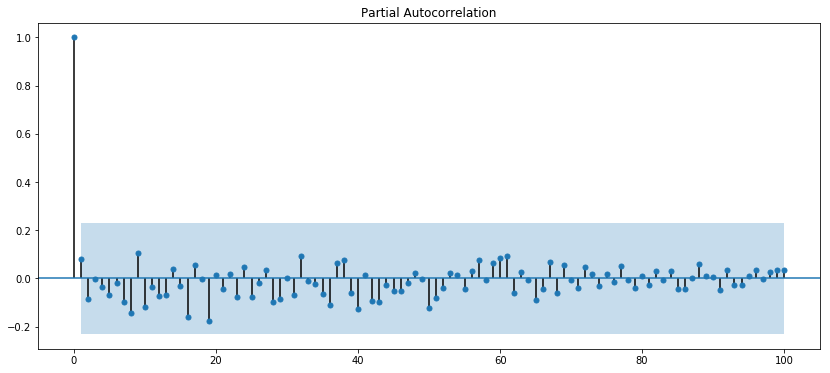

In [27]:
# your code here
rcParams['figure.figsize'] = 14, 6
plot_pacf(nyse, lags=100, method='ywm');

## Your conclusion here
The autocorrelation and partial autocorrelation plots do not indicate any signifiant lag relationship. 
The NYSE appears to be a series without trend or seasonality.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!